In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler



In [ ]:
train_conv = pd.read_excel('train_conv.xlsx')
test_conv = pd.read_excel('test_conv.xlsx')
train_social = pd.read_excel('train_social.xlsx')
test_social = pd.read_excel('test_social.xlsx')



In [ ]:
def process_social_data(df):
    # Avoid division by zero: add a small number to dislikes
    df['Likes_Dislikes_Ratio'] = df['Likes'] / (df['Dislikes'] + 1e-8)
    df.drop(['Likes', 'Dislikes'], axis=1, inplace=True)
    return df

In [ ]:
# Process the train and test social data
train_social = process_social_data(train_social)
test_social = process_social_data(test_social)

train_conv = train_conv.fillna(train_conv.median(numeric_only=True))
train_conv = train_conv.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'O' else x)
test_conv = test_conv.fillna(test_conv.median(numeric_only=True))
test_conv = test_conv.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'O' else x)
train_social = train_social.fillna(train_social.median())
test_social = test_social.fillna(test_social.median())

encoder = OneHotEncoder(sparse=False)
train_conv_encoded = encoder.fit_transform(train_conv[['Genre', 'Sequel']])
test_conv_encoded = encoder.transform(test_conv[['Genre', 'Sequel']])

encoded_columns = encoder.get_feature_names_out(['Genre', 'Sequel'])
train_conv = pd.concat([train_conv.drop(['Genre', 'Sequel'], axis=1), pd.DataFrame(train_conv_encoded, columns=encoded_columns)], axis=1)
test_conv = pd.concat([test_conv.drop(['Genre', 'Sequel'], axis=1), pd.DataFrame(test_conv_encoded, columns=encoded_columns)], axis=1)


<ipython-input-4-6f5cb3800ea2>:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_social = train_social.fillna(train_social.median())
<ipython-input-4-6f5cb3800ea2>:10: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_social = test_social.fillna(test_social.median())
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  war

In [ ]:
# Combine conventional and social media features
train_combined = pd.concat([train_conv, train_social.reset_index(drop=True)], axis=1)
test_combined = pd.concat([test_conv, test_social.reset_index(drop=True)], axis=1)

y_train_gross = train_conv['GrossLabel']
y_test_gross = test_conv['GrossLabel']
y_train_rating = train_conv['RatingLabel']
y_test_rating = test_conv['RatingLabel']



In [ ]:
# Drop labels from the combined datasets
train_conv = train_conv.drop(['GrossLabel', 'RatingLabel'], axis=1)
test_conv = test_conv.drop(['GrossLabel', 'RatingLabel'], axis=1)

train_social = train_social.drop(['GrossLabel', 'RatingLabel'], axis=1)
test_social = test_social.drop(['GrossLabel', 'RatingLabel'], axis=1)

train_combined = train_combined.drop(['GrossLabel', 'RatingLabel'], axis=1)
test_combined = test_combined.drop(['GrossLabel', 'RatingLabel'], axis=1)


gross_label_encoder = OneHotEncoder(sparse=False)
rating_label_encoder = OneHotEncoder(sparse=False)

In [ ]:
# Encode GrossLabel
y_train_gross_encoded = gross_label_encoder.fit_transform(y_train_gross.values.reshape(-1, 1))
y_test_gross_encoded = gross_label_encoder.transform(y_test_gross.values.reshape(-1, 1))

# Encode RatingLabel
y_train_rating_encoded = rating_label_encoder.fit_transform(y_train_rating.values.reshape(-1, 1))
y_test_rating_encoded = rating_label_encoder.transform(y_test_rating.values.reshape(-1, 1))



scaler_conv = StandardScaler()
scaler_social = StandardScaler()
scaler_combined = StandardScaler()

# Fit and transform the training data
train_conv_scaled = scaler_conv.fit_transform(train_conv)
train_social_scaled = scaler_social.fit_transform(train_social)
train_combined_scaled = scaler_combined.fit_transform(train_combined)

# Transform the test data using the corresponding scaler
test_conv_scaled = scaler_conv.transform(test_conv)
test_social_scaled = scaler_social.transform(test_social)
test_combined_scaled = scaler_combined.transform(test_combined)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# Encode the target labels
label_encoder_gross = LabelEncoder()
y_train_gross_encoded = label_encoder_gross.fit_transform(y_train_gross)
y_test_gross_encoded = label_encoder_gross.transform(y_test_gross)
class_labels = label_encoder_rating.classes_

In [ ]:
def train_and_evaluate_svm(X_train, y_train, X_test, y_test, feature_set_name, kernel='linear'):
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    # Accuracy and Classification Report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for SVM with {kernel} kernel on {feature_set_name}: {accuracy:.2f}")
    print(f"\nClassification Report for {feature_set_name}:")
    print(classification_report(y_test, y_pred))

    # Generate confusion matrix
    cm = confusion_matrix(y_test_rating_encoded, y_pred)
    # Plot confusion matrix with class labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title("SVM - Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
    plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)
    plt.show()

    return svm_model

Accuracy for SVM with linear kernel on Conventional Features: 0.57

Classification Report for Conventional Features:
              precision    recall  f1-score   support

           0       0.25      0.38      0.30         8
           1       0.89      0.80      0.84        10
           2       0.50      0.33      0.40         6
           3       0.64      0.61      0.62        23

    accuracy                           0.57        47
   macro avg       0.57      0.53      0.54        47
weighted avg       0.61      0.57      0.59        47



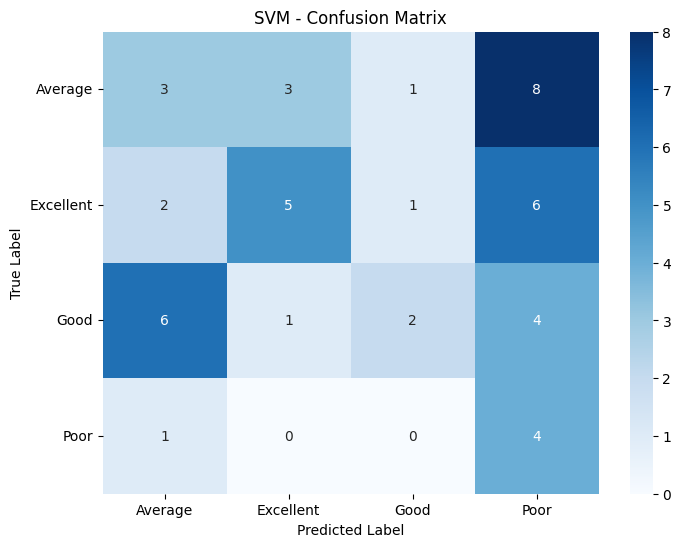

Accuracy for SVM with linear kernel on Social Features: 0.45

Classification Report for Social Features:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         6
           3       0.47      0.91      0.62        23

    accuracy                           0.45        47
   macro avg       0.12      0.23      0.15        47
weighted avg       0.23      0.45      0.30        47



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


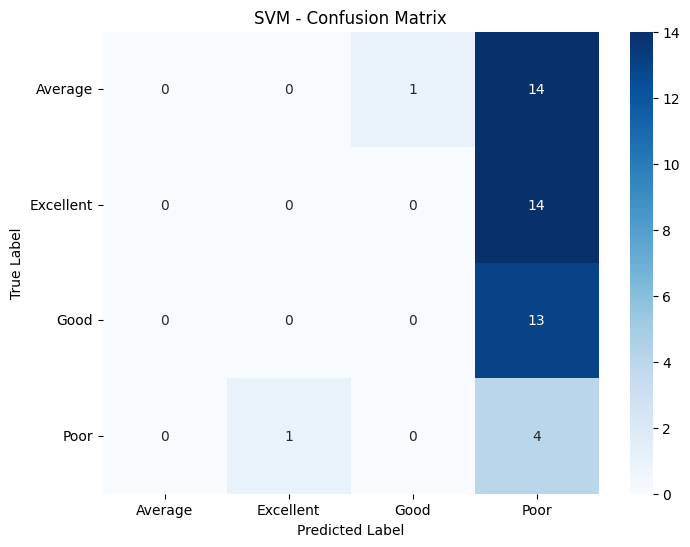

Accuracy for SVM with linear kernel on Combined Features: 0.51

Classification Report for Combined Features:
              precision    recall  f1-score   support

           0       0.27      0.50      0.35         8
           1       0.78      0.70      0.74        10
           2       0.50      0.17      0.25         6
           3       0.57      0.52      0.55        23

    accuracy                           0.51        47
   macro avg       0.53      0.47      0.47        47
weighted avg       0.55      0.51      0.51        47



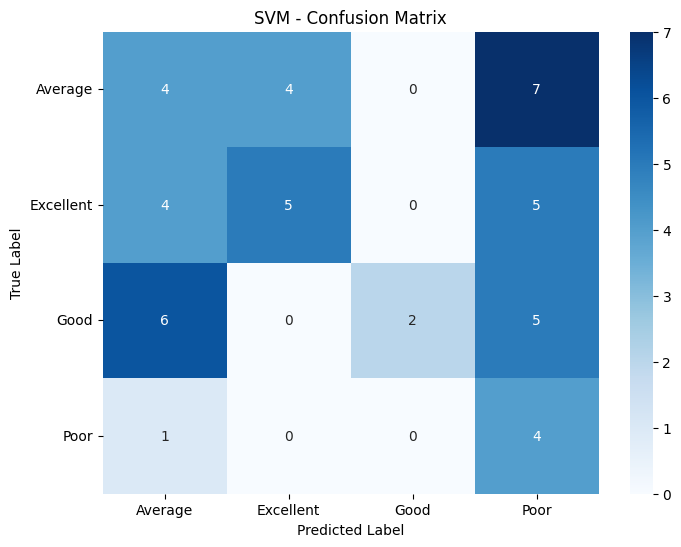

In [ ]:
# Train and evaluate SVM for conventional features
svm_gross_conv = train_and_evaluate_svm(train_conv_scaled, y_train_gross_encoded, test_conv_scaled, y_test_gross_encoded, "Conventional Features")

# Train and evaluate SVM for social media features
svm_gross_social = train_and_evaluate_svm(train_social_scaled, y_train_gross_encoded, test_social_scaled, y_test_gross_encoded, "Social Features")

# Train and evaluate SVM for combined features
svm_gross_combined = train_and_evaluate_svm(train_combined_scaled, y_train_gross_encoded, test_combined_scaled, y_test_gross_encoded, "Combined Features")

In [ ]:
# Encode the target labels
label_encoder_gross = LabelEncoder()
y_train_gross_encoded = label_encoder_gross.fit_transform(y_train_gross)
y_test_gross_encoded = label_encoder_gross.transform(y_test_gross)
class_labels = label_encoder_rating.classes_

In [ ]:
def train_and_evaluate_svm(X_train, y_train, X_test, y_test, feature_set_name, kernel='linear'):
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    # Accuracy and Classification Report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for SVM with {kernel} kernel on {feature_set_name}: {accuracy:.2f}")
    print(f"\nClassification Report for {feature_set_name}:")
    print(classification_report(y_test, y_pred))

    # Generate confusion matrix
    cm = confusion_matrix(y_test_rating_encoded, y_pred)
    # Plot confusion matrix with class labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title("SVM - Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
    plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)
    plt.show()

    return svm_model

In [ ]:
label_encoder_rating = LabelEncoder()
y_train_rating_encoded = label_encoder_rating.fit_transform(y_train_rating)
y_test_rating_encoded = label_encoder_rating.transform(y_test_rating)
class_labels = label_encoder_rating.classes_

Accuracy for SVM with linear kernel on Conventional Features: 0.34

Classification Report for Conventional Features:
              precision    recall  f1-score   support

           0       0.35      0.53      0.42        15
           1       1.00      0.07      0.13        14
           2       0.30      0.46      0.36        13
           3       0.33      0.20      0.25         5

    accuracy                           0.34        47
   macro avg       0.50      0.32      0.29        47
weighted avg       0.53      0.34      0.30        47



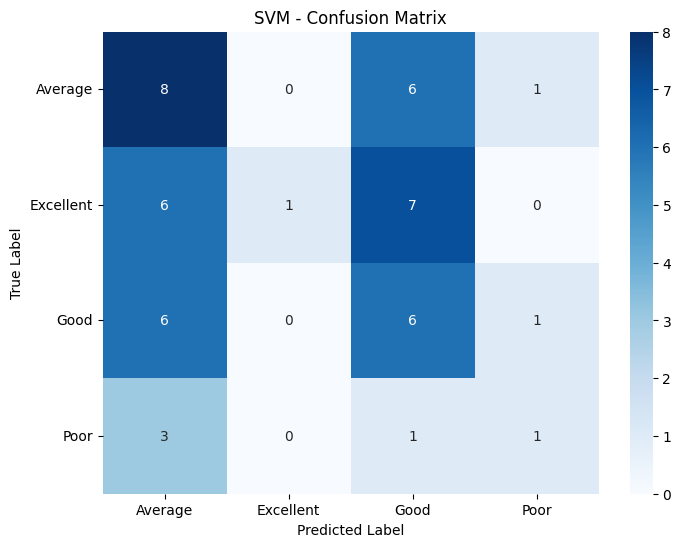

Accuracy for SVM with linear kernel on Social Media Features: 0.28

Classification Report for Social Media Features:
              precision    recall  f1-score   support

           0       0.28      0.73      0.41        15
           1       0.00      0.00      0.00        14
           2       0.29      0.15      0.20        13
           3       0.00      0.00      0.00         5

    accuracy                           0.28        47
   macro avg       0.14      0.22      0.15        47
weighted avg       0.17      0.28      0.19        47



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


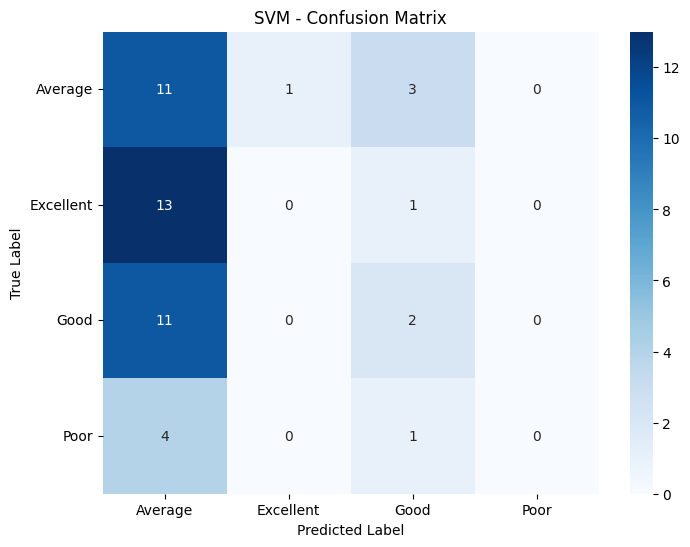

Accuracy for SVM with linear kernel on Combined Features: 0.32

Classification Report for Combined Features:
              precision    recall  f1-score   support

           0       0.35      0.40      0.38        15
           1       0.33      0.07      0.12        14
           2       0.29      0.54      0.38        13
           3       0.33      0.20      0.25         5

    accuracy                           0.32        47
   macro avg       0.33      0.30      0.28        47
weighted avg       0.33      0.32      0.29        47



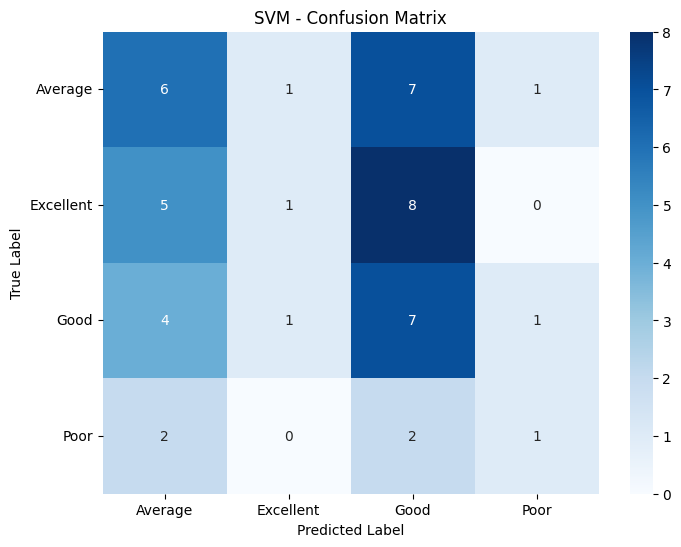

In [ ]:
# Train and evaluate for each feature set
svm_rating_conv_rbf = train_and_evaluate_svm(train_conv_scaled, y_train_rating_encoded, test_conv_scaled, y_test_rating_encoded, "Conventional Features")
svm_rating_social_rbf = train_and_evaluate_svm(train_social_scaled, y_train_rating_encoded, test_social_scaled, y_test_rating_encoded, "Social Media Features")
svm_rating_combined_rbf = train_and_evaluate_svm(train_combined_scaled, y_train_rating_encoded, test_combined_scaled, y_test_rating_encoded, "Combined Features")


In [ ]:
def train_and_evaluate_svm(X_train, y_train, X_test, y_test, feature_set_name, kernel='rbf'):
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    # Accuracy and Classification Report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for SVM with {kernel} kernel on {feature_set_name}: {accuracy:.2f}")
    print(f"\nClassification Report for {feature_set_name}:")
    print(classification_report(y_test, y_pred))

    # Generate confusion matrix
    cm = confusion_matrix(y_test_rating_encoded, y_pred)
    # Plot confusion matrix with class labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title("SVM - Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
    plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)
    plt.show()

    return svm_model

Accuracy for SVM with rbf kernel on Conventional Features: 0.64

Classification Report for Conventional Features:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.70      0.70      0.70        10
           2       0.00      0.00      0.00         6
           3       0.66      0.83      0.73        23

    accuracy                           0.64        47
   macro avg       0.46      0.51      0.48        47
weighted avg       0.55      0.64      0.59        47



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


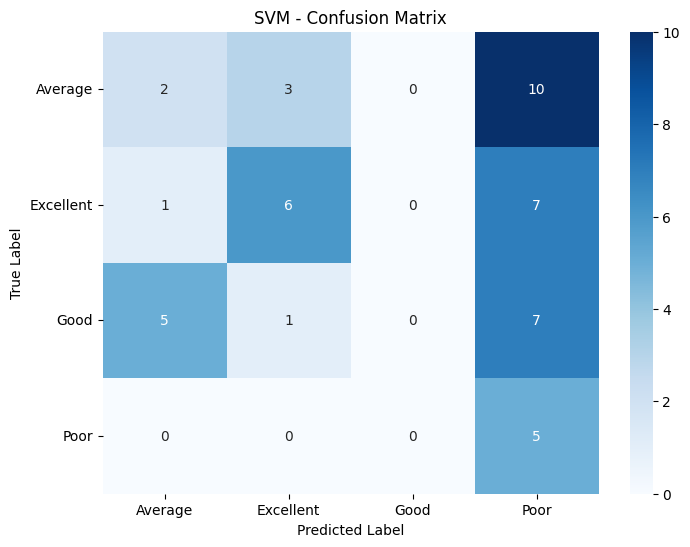

Accuracy for SVM with rbf kernel on Social Features: 0.45

Classification Report for Social Features:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.33      0.10      0.15        10
           2       0.00      0.00      0.00         6
           3       0.47      0.87      0.61        23

    accuracy                           0.45        47
   macro avg       0.20      0.24      0.19        47
weighted avg       0.30      0.45      0.33        47



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


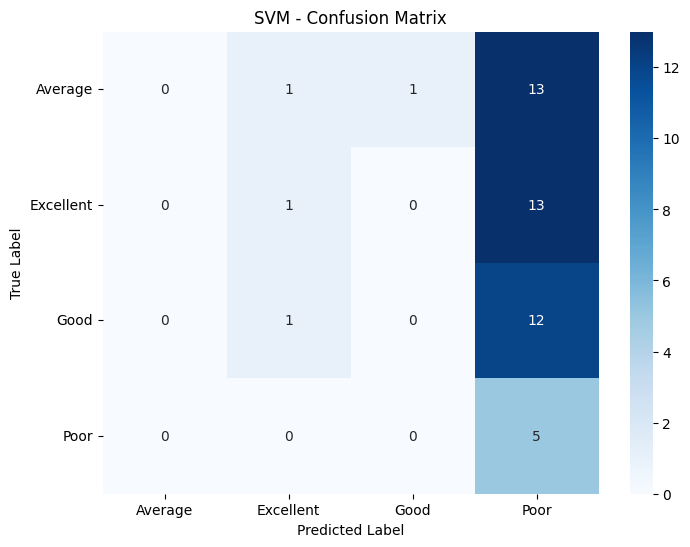

Accuracy for SVM with rbf kernel on Combined Features: 0.55

Classification Report for Combined Features:
              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.58      0.70      0.64        10
           2       0.00      0.00      0.00         6
           3       0.57      0.70      0.63        23

    accuracy                           0.55        47
   macro avg       0.40      0.44      0.42        47
weighted avg       0.48      0.55      0.51        47



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


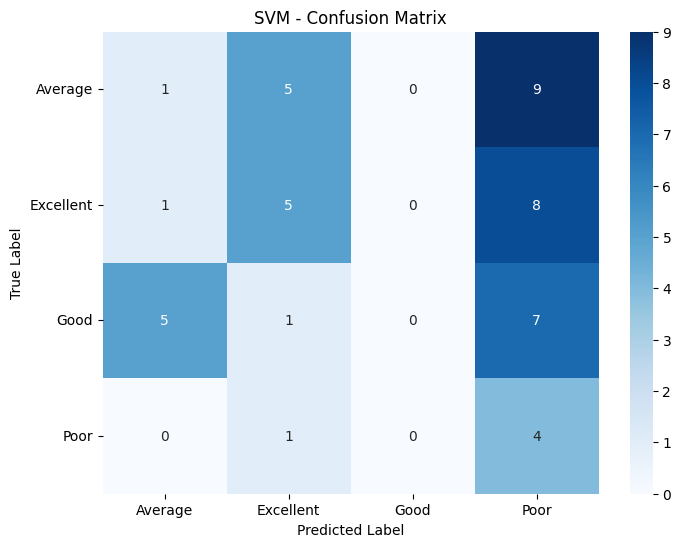

In [ ]:
# Train and evaluate SVM for conventional features
svm_gross_conv = train_and_evaluate_svm(train_conv_scaled, y_train_gross_encoded, test_conv_scaled, y_test_gross_encoded, "Conventional Features")

# Train and evaluate SVM for social media features
svm_gross_social = train_and_evaluate_svm(train_social_scaled, y_train_gross_encoded, test_social_scaled, y_test_gross_encoded, "Social Features")

# Train and evaluate SVM for combined features
svm_gross_combined = train_and_evaluate_svm(train_combined_scaled, y_train_gross_encoded, test_combined_scaled, y_test_gross_encoded, "Combined Features")

In [ ]:
#kernel='rbf

# Encode the target labels
label_encoder_gross = LabelEncoder()
y_train_gross_encoded = label_encoder_gross.fit_transform(y_train_gross)
y_test_gross_encoded = label_encoder_gross.transform(y_test_gross)



Accuracy for SVM with rbf kernel on Conventional Features: 0.34

Classification Report for Conventional Features:
              precision    recall  f1-score   support

           0       0.35      0.53      0.42        15
           1       1.00      0.07      0.13        14
           2       0.30      0.46      0.36        13
           3       0.33      0.20      0.25         5

    accuracy                           0.34        47
   macro avg       0.50      0.32      0.29        47
weighted avg       0.53      0.34      0.30        47



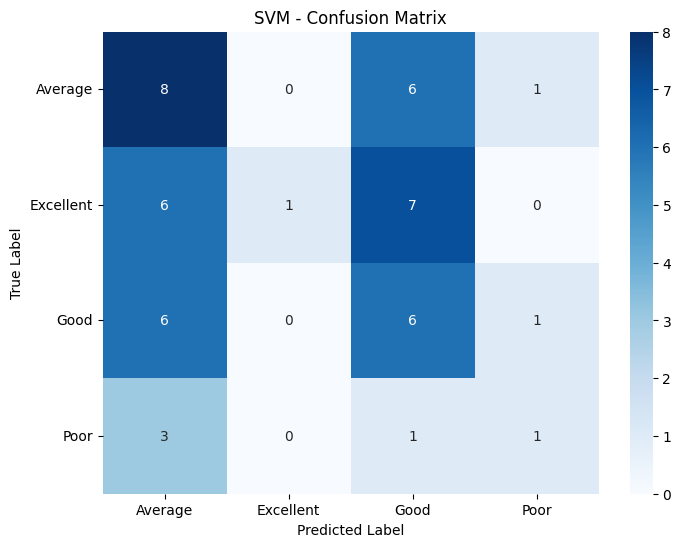

Accuracy for SVM with rbf kernel on Social Media Features: 0.26

Classification Report for Social Media Features:
              precision    recall  f1-score   support

           0       0.27      0.47      0.34        15
           1       0.50      0.07      0.12        14
           2       0.22      0.31      0.26        13
           3       0.00      0.00      0.00         5

    accuracy                           0.26        47
   macro avg       0.25      0.21      0.18        47
weighted avg       0.30      0.26      0.22        47



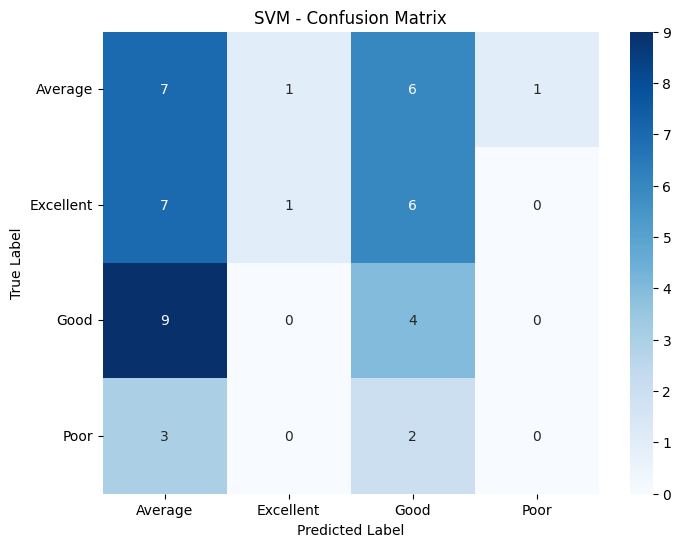

Accuracy for SVM with rbf kernel on Combined Features: 0.38

Classification Report for Combined Features:
              precision    recall  f1-score   support

           0       0.42      0.67      0.51        15
           1       1.00      0.07      0.13        14
           2       0.32      0.46      0.37        13
           3       0.33      0.20      0.25         5

    accuracy                           0.38        47
   macro avg       0.52      0.35      0.32        47
weighted avg       0.55      0.38      0.33        47



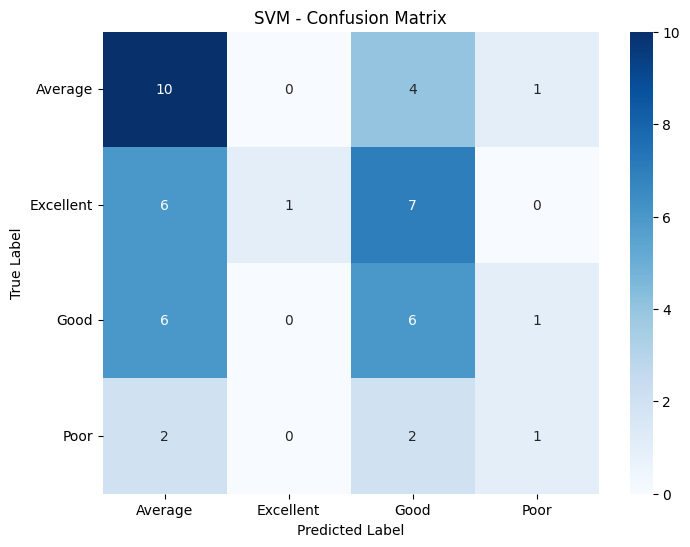

In [ ]:


# Encode the target variable 'RatingLabel'
label_encoder_rating = LabelEncoder()
y_train_rating_encoded = label_encoder_rating.fit_transform(y_train_rating)
y_test_rating_encoded = label_encoder_rating.transform(y_test_rating)
# Get class labels from the LabelEncoder
class_labels = label_encoder_rating.classes_


def train_and_evaluate_svm(X_train, y_train, X_test, y_test, feature_set_name, kernel='rbf'):
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    # Accuracy and Classification Report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for SVM with {kernel} kernel on {feature_set_name}: {accuracy:.2f}")
    print(f"\nClassification Report for {feature_set_name}:")
    print(classification_report(y_test, y_pred))

    # Generate confusion matrix
    cm = confusion_matrix(y_test_rating_encoded, y_pred)
    # Plot confusion matrix with class labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title("SVM - Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
    plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)
    plt.show()

    return svm_model

# Train and evaluate for each feature set
svm_rating_conv_rbf = train_and_evaluate_svm(train_conv_scaled, y_train_rating_encoded, test_conv_scaled, y_test_rating_encoded, "Conventional Features")
svm_rating_social_rbf = train_and_evaluate_svm(train_social_scaled, y_train_rating_encoded, test_social_scaled, y_test_rating_encoded, "Social Media Features")
svm_rating_combined_rbf = train_and_evaluate_svm(train_combined_scaled, y_train_rating_encoded, test_combined_scaled, y_test_rating_encoded, "Combined Features")


In [ ]:
def train_and_evaluate_svm(X_train, y_train, X_test, y_test, kernel_type='rbf'):
    svm_model = SVC(kernel=kernel_type)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    # Print accuracy and classification report
    print(f"Accuracy for SVM with {kernel_type} kernel: {accuracy_score(y_test, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f"SVM with {kernel_type} kernel - Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return svm_model

Accuracy for SVM with rbf kernel: 0.34

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.53      0.42        15
           1       1.00      0.07      0.13        14
           2       0.30      0.46      0.36        13
           3       0.33      0.20      0.25         5

    accuracy                           0.34        47
   macro avg       0.50      0.32      0.29        47
weighted avg       0.53      0.34      0.30        47



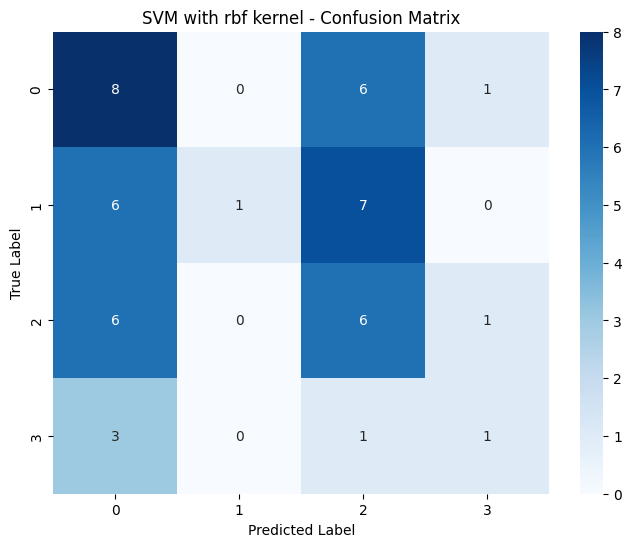

Accuracy for SVM with rbf kernel: 0.26

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.47      0.34        15
           1       0.50      0.07      0.12        14
           2       0.22      0.31      0.26        13
           3       0.00      0.00      0.00         5

    accuracy                           0.26        47
   macro avg       0.25      0.21      0.18        47
weighted avg       0.30      0.26      0.22        47



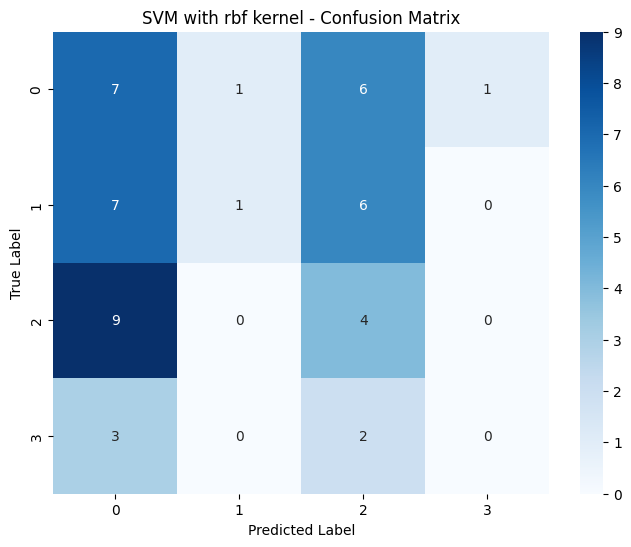

Accuracy for SVM with rbf kernel: 0.38

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.67      0.51        15
           1       1.00      0.07      0.13        14
           2       0.32      0.46      0.37        13
           3       0.33      0.20      0.25         5

    accuracy                           0.38        47
   macro avg       0.52      0.35      0.32        47
weighted avg       0.55      0.38      0.33        47



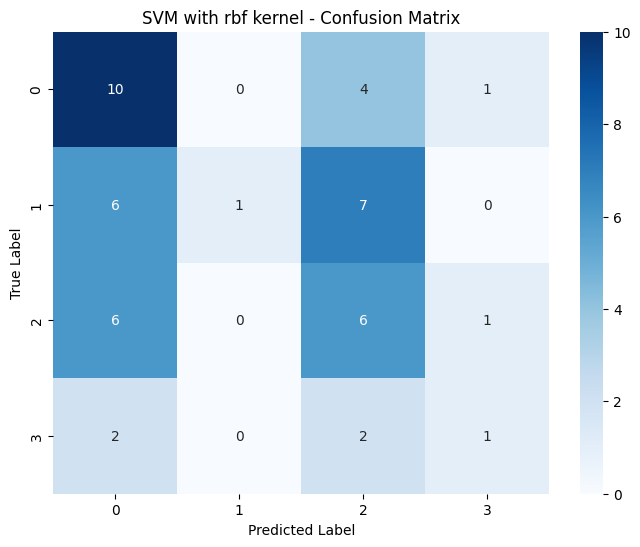

In [ ]:
# Train and evaluate for each feature set
svm_rating_conv = train_and_evaluate_svm(train_conv_scaled, y_train_rating_encoded, test_conv_scaled, y_test_rating_encoded)
svm_rating_social = train_and_evaluate_svm(train_social_scaled, y_train_rating_encoded, test_social_scaled, y_test_rating_encoded)
svm_rating_combined = train_and_evaluate_svm(train_combined_scaled, y_train_rating_encoded, test_combined_scaled, y_test_rating_encoded)

In [ ]:
# Define the label locations and width of the bars
labels = ['GrossLabel', 'RatingLabel']
social_scores = [accuracy_scores['GrossLabel']['Social'], accuracy_scores['RatingLabel']['Social']]
conventional_scores = [accuracy_scores['GrossLabel']['Conventional'], accuracy_scores['RatingLabel']['Conventional']]
combined_scores = [accuracy_scores['GrossLabel']['Combined'], accuracy_scores['RatingLabel']['Combined']]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()

# Plot the bars
rects1 = ax.bar(x - width, social_scores, width, label='Social', color='blue')
rects2 = ax.bar(x, conventional_scores, width, label='Conventional', color='red')
rects3 = ax.bar(x + width, combined_scores, width, label='Combined', color='green')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()